In [1]:
import pandas as pd
import numpy as np
from infomap import Infomap
import networkx as nx
import matplotlib.pyplot as plt
import time


Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


# Load the synthetic networks

In [3]:
p_core = 0.4
tikese = np.arange(0,96,5)


p_in_sinks_sources = np.arange(0,p_core,0.05)
p_out_sinks_sources = np.arange(0.1,p_core,0.05)

In [20]:
p_in = p_in_sinks_sources[-1]
p_out = p_out_sinks_sources[0]
adj = np.load('replication Infomap/SBMs/complex_sbms/complex_w_ecore04_pin%s_pout%s_dir_graph_random_frac_Eremoved%s.npy'%(p_in,p_out,tikese[0]))

G = nx.from_numpy_array(adj,create_using=nx.DiGraph())

edge_list = list(G.edges)
nodes = list(G.nodes)
E = len(edge_list)
list_of_graphs = [G]
for frac in np.arange(1,len(tikese),1):
    gr0 = np.load('replication Infomap/SBMs/complex_sbms/complex_w_ecore04_pin%s_pout%s_dir_graph_random_frac_Eremoved%s.npy'%(p_in,p_out,tikese[frac]))
    G0 = nx.from_numpy_array(gr0,create_using=nx.DiGraph())

    list_of_graphs.append(G0)






In [21]:
p_in

0.35000000000000003

In [22]:
p_out

0.1

# Ground truth partition

In [23]:
communities_new = np.concatenate([np.repeat(1,20),np.repeat(2,20),np.repeat(3,60),np.repeat(4,60),np.repeat(5,20),np.repeat(6,20)])


# Run infomap on one network

In [24]:
# infomap
G_w=list_of_graphs[0]
im = Infomap(silent=True,two_level=True,num_trials=50,regularized=True,regularization_strength=0.3,directed=True)
im.add_networkx_graph(G_w)
im.run()

nodelist = G_w.nodes
modules_gt = dict(im.modules)
infomap_ground_truth_labs = [modules_gt[node] for node in nodelist]

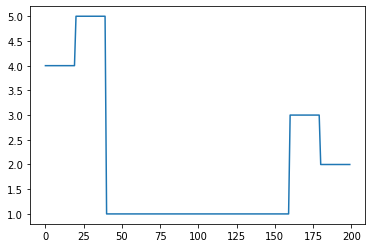

In [25]:
plt.plot(infomap_ground_truth_labs)

In [10]:
from sklearn.metrics.cluster import normalized_mutual_info_score


n_c_info_sbm = np.zeros(20)
nmi_info = np.zeros(20)
for i in range(20):
    G_w=list_of_graphs[i]
    im = Infomap(silent=True,two_level=True,num_trials=50,regularized=True,regularization_strength=0.3)
    im.add_networkx_graph(G_w)
    im.run()

    nodelist = G_w.nodes
    modules = dict(im.modules)
    infomap_ground_new = [modules[node] for node in nodelist]
    nmi_info[i] = normalized_mutual_info_score(communities_new,infomap_ground_new)
    n_c_info_sbm[i] = np.max(infomap_ground_new)
    

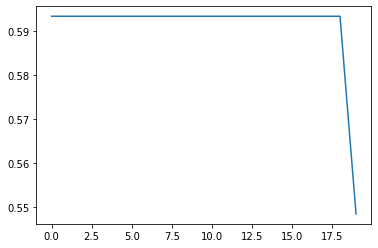

In [11]:
plt.plot(nmi_info)

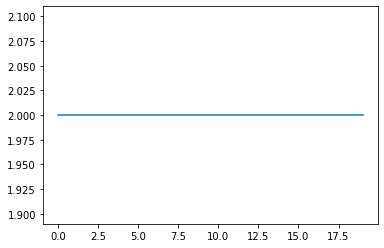

In [12]:
plt.plot(n_c_info_sbm)

# Run Infomap for all $(p_{in},p_{out})$

In [13]:
from sklearn.metrics.cluster import normalized_mutual_info_score





# NMIs_regInfo = [[[] for j in range(len(p_in_sinks_sources))] for h in range(len(p_out_sinks_sources))]
# NCs_regInfo = [[[] for j in range(len(p_in_sinks_sources))] for h in range(len(p_out_sinks_sources))]

NMIs_regInfo = np.zeros((len(p_in_sinks_sources),len(p_out_sinks_sources),20))
NCs_regInfo = np.zeros((len(p_in_sinks_sources),len(p_out_sinks_sources),20))

for m in np.arange(0,len(p_in_sinks_sources),1):
    p_in = p_in_sinks_sources[m]
    for l in range(len(p_out_sinks_sources)):
        p_out = p_out_sinks_sources[l]
        
        print("p_in %s"%p_in)
        print("p_out %s"%p_out)
        

        adj = np.load('replication Infomap/SBMs/complex_sbms/complex_w_ecore04_pin%s_pout%s_dir_graph_random_frac_Eremoved%s.npy'%(p_in,p_out,tikese[0]))
        G = nx.from_numpy_array(adj,create_using=nx.DiGraph())

        edge_list = list(G.edges)
        nodes = list(G.nodes)
        E = len(edge_list)
        list_of_graphs = [G]
        for frac in np.arange(1,15,1):
            gr0 = np.load('replication Infomap/SBMs/complex_sbms/complex_w_ecore04_pin%s_pout%s_dir_graph_random_frac_Eremoved%s.npy'%(p_in,p_out,tikese[frac]))
            G0 = nx.from_numpy_array(gr0,create_using=nx.DiGraph())

            list_of_graphs.append(G0)





        
        
        n_c_info_sbm = np.zeros(len(list_of_graphs))
        nmi_info = np.zeros(len(list_of_graphs))
        for i in range(len(list_of_graphs)):
            G_w=list_of_graphs[i]
            im = Infomap(silent=True,two_level=True,num_trials=50,regularized=True,regularization_strength=0.3)
            im.add_networkx_graph(G_w)
            im.run()

            nodelist = G_w.nodes
            modules = dict(im.modules)
            infomap_ground_new = [modules[node] for node in nodelist]
            nmi_info[i] = normalized_mutual_info_score(communities_new,infomap_ground_new)
            n_c_info_sbm[i] = np.max(infomap_ground_new)
            
            NMIs_regInfo[m][l][i] = normalized_mutual_info_score(communities_new,infomap_ground_new)
            NCs_regInfo[m][l][i] = np.max(infomap_ground_new)
        
        
np.save('replication Infomap/SBMs/NMIs_REG_INFOMAP_pin_pout',NMIs_regInfo)
np.save('replication Infomap/SBMs/NCs_REG_INFOMAP_pin_pout',NCs_regInfo)



p_in 0.0
p_out 0.1
p_in 0.0
p_out 0.15000000000000002
p_in 0.0
p_out 0.20000000000000004
p_in 0.0
p_out 0.25000000000000006
p_in 0.0
p_out 0.30000000000000004
p_in 0.0
p_out 0.3500000000000001
p_in 0.0
p_out 0.40000000000000013
p_in 0.05
p_out 0.1
p_in 0.05
p_out 0.15000000000000002
p_in 0.05
p_out 0.20000000000000004
p_in 0.05
p_out 0.25000000000000006
p_in 0.05
p_out 0.30000000000000004
p_in 0.05
p_out 0.3500000000000001
p_in 0.05
p_out 0.40000000000000013
p_in 0.1
p_out 0.1
p_in 0.1
p_out 0.15000000000000002
p_in 0.1
p_out 0.20000000000000004
p_in 0.1
p_out 0.25000000000000006
p_in 0.1
p_out 0.30000000000000004
p_in 0.1
p_out 0.3500000000000001
p_in 0.1
p_out 0.40000000000000013
p_in 0.15000000000000002
p_out 0.1
p_in 0.15000000000000002
p_out 0.15000000000000002
p_in 0.15000000000000002
p_out 0.20000000000000004
p_in 0.15000000000000002
p_out 0.25000000000000006
p_in 0.15000000000000002
p_out 0.30000000000000004
p_in 0.15000000000000002
p_out 0.3500000000000001
p_in 0.1500000000000

In [14]:
fractions=np.arange(5,96,5)[:15]
fractions

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

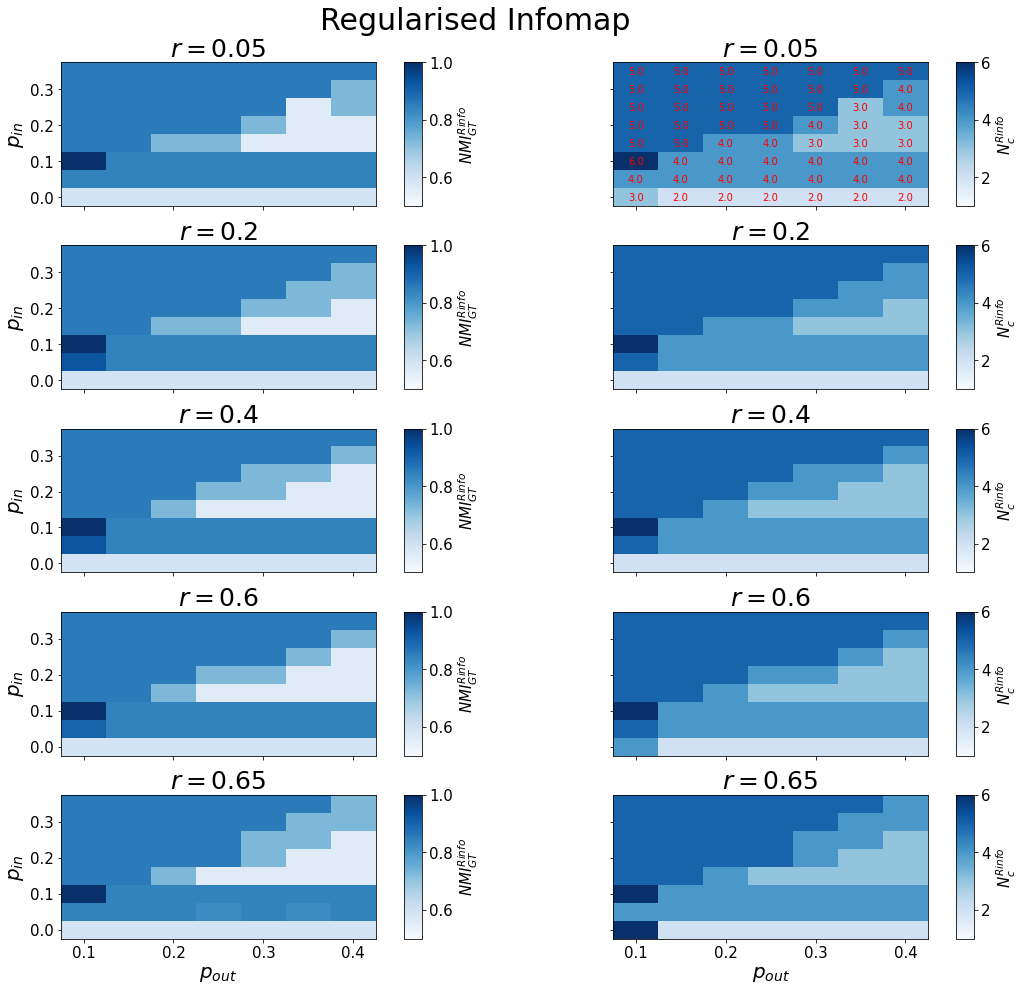

In [19]:
fig,ax = plt.subplots(5,2,figsize=(16,14),sharex=True,sharey=True)
im=ax[0,0].imshow(NMIs_regInfo[:,:,0],aspect=0.4,cmap='Blues',vmax=1,vmin=0.5,origin='lower')
ax[0,0].set_yticks(np.arange(0,len(p_in_sinks_sources),2),[0. , 0.1, 0.2, 0.3],fontsize=15)
ax[0,0].set_ylabel(r'$p_{in}$',fontsize=20)
ax[0,0].set_title(r"$r=%s$"%(fractions[0]/100),fontsize=25)


im1=ax[1,0].imshow(NMIs_regInfo[:,:,3],aspect=0.4,cmap='Blues',vmax=1,vmin=0.5,origin='lower')
ax[1,0].set_yticks(np.arange(0,len(p_in_sinks_sources),2),[0. , 0.1, 0.2, 0.3],fontsize=15)
ax[1,0].set_ylabel(r'$p_{in}$',fontsize=20)
ax[1,0].set_title(r"$r=%s$"%(fractions[3]/100),fontsize=25)


im2=ax[2,0].imshow(NMIs_regInfo[:,:,7],aspect=0.4,cmap='Blues',vmax=1,vmin=0.5,origin='lower')
ax[2,0].set_yticks(np.arange(0,len(p_in_sinks_sources),2),[0. , 0.1, 0.2, 0.3],fontsize=15)
ax[2,0].set_xticks(np.arange(0,len(p_out_sinks_sources),1),[0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ],fontsize=15)
ax[2,0].set_ylabel(r'$p_{in}$',fontsize=20)
# ax[2,0].set_xlabel(r'$p_{out}$',fontsize=20)
ax[2,0].set_title(r"$r=%s$"%(fractions[7]/100),fontsize=25)


imA=ax[3,0].imshow(NMIs_regInfo[:,:,11],aspect=0.4,cmap='Blues',vmax=1,vmin=0.5,origin='lower')
ax[3,0].set_yticks(np.arange(0,len(p_in_sinks_sources),2),[0. , 0.1, 0.2, 0.3],fontsize=15)
ax[3,0].set_xticks(np.arange(0,len(p_out_sinks_sources),1),[0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ],fontsize=15)
ax[3,0].set_ylabel(r'$p_{in}$',fontsize=20)
# ax,0[3,0].set_xlabel(r'$p_{out}$',fontsize=20)
ax[3,0].set_title(r"$r=%s$"%(fractions[11]/100),fontsize=25)

imAA=ax[4,0].imshow(NMIs_regInfo[:,:,12],aspect=0.4,cmap='Blues',vmax=1,vmin=0.5,origin='lower')
ax[4,0].set_yticks(np.arange(0,len(p_in_sinks_sources),2),[0. , 0.1, 0.2, 0.3],fontsize=15)
ax[4,0].set_xticks(np.arange(0,len(p_out_sinks_sources),1),[0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ],fontsize=15)
ax[4,0].set_ylabel(r'$p_{in}$',fontsize=20)
ax[4,0].set_xlabel(r'$p_{out}$',fontsize=20)
ax[4,0].set_title(r"$r=%s$"%(fractions[12]/100),fontsize=25)

cbar=fig.colorbar(im, ax=ax[0,0],aspect=8,pad=0.05)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$NMI^{Rinfo}_{GT}$',fontsize=15)

cbar1=fig.colorbar(im1, ax=ax[1,0],aspect=8,pad=0.05)
cbar1.ax.tick_params(labelsize=15)
cbar1.set_label(r'$NMI^{Rinfo}_{GT}$',fontsize=15)

cbar2=fig.colorbar(im2, ax=ax[2,0],aspect=8,pad=0.05)
cbar2.ax.tick_params(labelsize=15)
cbar2.set_label(r'$NMI^{Rinfo}_{GT}$',fontsize=15)

cbarA=fig.colorbar(imA, ax=ax[3,0],aspect=8,pad=0.05)
cbarA.ax.tick_params(labelsize=15)
cbarA.set_label(r'$NMI^{Rinfo}_{GT}$',fontsize=15)

cbarAA=fig.colorbar(imAA, ax=ax[4,0],aspect=8,pad=0.05)
cbarAA.ax.tick_params(labelsize=15)
cbarAA.set_label(r'$NMI^{Rinfo}_{GT}$',fontsize=15)

im3=ax[0,1].imshow(NCs_regInfo[:,:,0],aspect=0.4,cmap='Blues',vmax=6,vmin=1,origin='lower')
# Loop over data dimensions and create text annotations.
for i in range(8):
    for j in range(7):
        text = ax[0,1].text(j, i, NCs_regInfo[i, j,0],
                       ha="center", va="center", color="r")

# ax[0,1].set_ylabel(r'$p_{in}$',fontsize=20)


im4=ax[1,1].imshow(NCs_regInfo[:,:,3],aspect=0.4,cmap='Blues',vmax=6,vmin=1,origin='lower')
# ax[1,1].set_ylabel(r'$p_{in}$',fontsize=20)

im5=ax[2,1].imshow(NCs_regInfo[:,:,7],aspect=0.4,cmap='Blues',vmax=6,vmin=1,origin='lower')
# ax[2,1].set_xticks(np.arange(0,len(p_out_sinks_sources),1),[0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ],fontsize=15)
# ax[2,1].set_ylabel(r'$p_{in}$',fontsize=20)
# ax[2,1].set_xlabel(r'$p_{out}$',fontsize=20)

imB=ax[3,1].imshow(NCs_regInfo[:,:,11],aspect=0.4,cmap='Blues',vmax=6,vmin=1,origin='lower')
ax[3,1].set_xticks(np.arange(0,len(p_out_sinks_sources),2),[0.1 , 0.2 , 0.3 , 0.4 ],fontsize=15)
# ax[3,1].set_ylabel(r'$p_{in}$',fontsize=20)
# ax[3,1].set_xlabel(r'$p_{out}$',fontsize=20)

imBB=ax[4,1].imshow(NCs_regInfo[:,:,12],aspect=0.4,cmap='Blues',vmax=6,vmin=1,origin='lower')
ax[4,1].set_xticks(np.arange(0,len(p_out_sinks_sources),2),[0.1 , 0.2 , 0.3 , 0.4 ],fontsize=15)
# ax[4,1].set_ylabel(r'$p_{in}$',fontsize=20)
ax[4,1].set_xlabel(r'$p_{out}$',fontsize=20)


ax[0,1].set_title(r"$r=%s$"%(fractions[0]/100),fontsize=25)

ax[1,1].set_title(r"$r=%s$"%(fractions[3]/100),fontsize=25)

ax[2,1].set_title(r"$r=%s$"%(fractions[7]/100),fontsize=25)

ax[3,1].set_title(r"$r=%s$"%(fractions[11]/100),fontsize=25)

ax[4,1].set_title(r"$r=%s$"%(fractions[12]/100),fontsize=25)

fig.suptitle(r'Regularised Infomap',fontsize=30)

cbar3=fig.colorbar(im3, ax=ax[0,1],aspect=8,pad=0.05)
cbar3.ax.tick_params(labelsize=15)
cbar3.set_label(r'$N_c^{Rinfo}$',fontsize=15)

cbar4=fig.colorbar(im4, ax=ax[1,1],aspect=8,pad=0.05)
cbar4.ax.tick_params(labelsize=15)
cbar4.set_label(r'$N_c^{Rinfo}$',fontsize=15)

cbar5=fig.colorbar(im5, ax=ax[2,1],aspect=8,pad=0.05)
cbar5.ax.tick_params(labelsize=15)
cbar5.set_label(r'$N_c^{Rinfo}$',fontsize=15)

cbarB=fig.colorbar(imB, ax=ax[3,1],aspect=8,pad=0.05)
cbarB.ax.tick_params(labelsize=15)
cbarB.set_label(r'$N_c^{Rinfo}$',fontsize=15)

cbarBB=fig.colorbar(imBB, ax=ax[4,1],aspect=8,pad=0.05)
cbarBB.ax.tick_params(labelsize=15)
cbarBB.set_label(r'$N_c^{Rinfo}$',fontsize=15)
plt.savefig('replication Infomap/SBMs/NMI_Nc_pin_pout_several_r.png')
plt.savefig('replication Infomap/SBMs/NMI_Nc_pin_pout_several_r.svg')
plt.savefig('replication Infomap/SBMs/NMI_Nc_pin_pout_several_r.pdf')



plt.tight_layout()